# Introduction

 Introduction: Project Objectives and Usefulness The objective of this project is to perform an exploratory analysis of a video game sales dataset. I am going to use Cluster Analysis and Unsupervised Learning techniques to uncover hidden patterns and structures within the data. This will help in identifying segments of games based on sales performance, platform usage, and genre popularity, which can inform decision-making processes for game publishers, marketers, and other stakeholders in the gaming industry.

Cluster Analysis: Grouping video games based on features such as sales by region, genre, platform, and other attributes. The goal is to identify clusters of games with similar sales characteristics.

The findings from this analysis can guide publishers in targeting specific regions, platforms, or genres and help investors or stakeholders make informed decisions.

In [2]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import dmba

%matplotlib inline

# **Data**

This dataset contains a list of video games with sales greater than 100,000 copies.

Fields include

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

In [4]:
Videogames_df = pd.read_csv('C:\\Users\\Natasha Maina\\OneDrive - University of Nebraska-Lincoln\\Desktop\\Python Work\\vgsales.csv')

In [5]:
Videogames_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
Videogames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
Videogames_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


**Data Preprocessing**

In [8]:
Videogames_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Looking at the missing values resent in the data, there appear to 271 missing values in the year variable, and 58 missing values in the Publisher variable.

In [9]:
Videogames_df.dropna(inplace=True)

In [10]:
Videogames_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

For improved clustering and comparison, I first need to normalize the sales data, and encode the categorical variables Platform and Genre.

In [11]:
Videogames_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
# Display basic information about the dataset
Videogames_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


# **Exploratory Data Analysis (EDA)**

**Univariate Analysis**

Here, we analyze individual variables, focusing on their distribution.

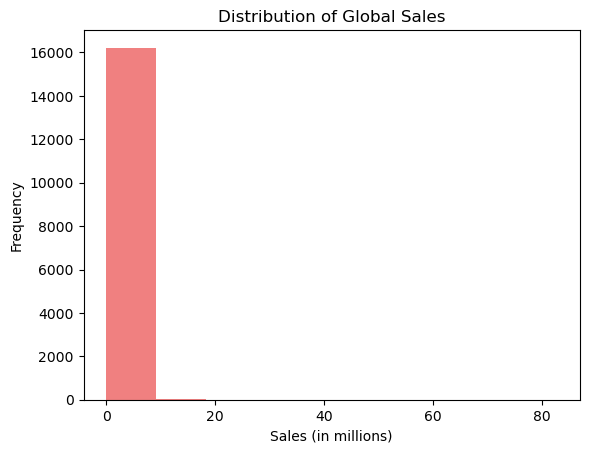

In [13]:
# Plot the distribution of Global Sales
plt.hist(Videogames_df['Global_Sales'], bins=9, color='lightcoral')
plt.title('Distribution of Global Sales')
plt.xlabel('Sales (in millions)')
plt.ylabel('Frequency')
plt.show()


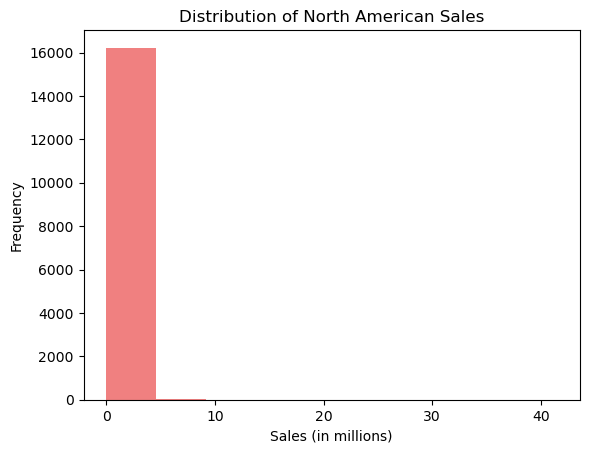

In [14]:
# Plot the Distribution of North American Sales
plt.hist(Videogames_df['NA_Sales'], bins=9, color='lightcoral')
plt.title('Distribution of North American Sales')
plt.xlabel('Sales (in millions)')
plt.ylabel('Frequency')
plt.show()


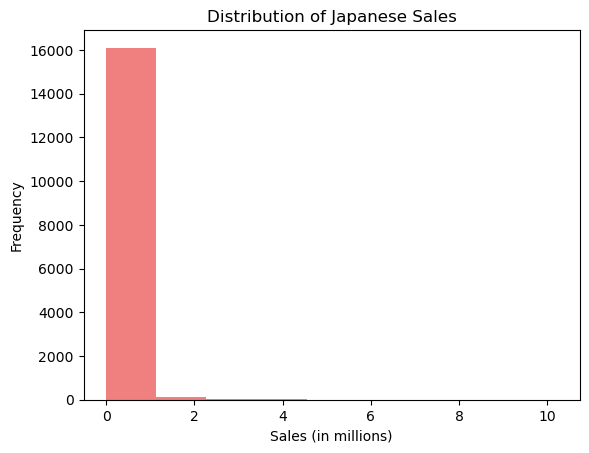

In [15]:
# Plot the Distribution of Japanese Sales
plt.hist(Videogames_df['JP_Sales'], bins=9, color='lightcoral')
plt.title('Distribution of Japanese Sales')
plt.xlabel('Sales (in millions)')
plt.ylabel('Frequency')
plt.show()

Looking at the histograms for the distribution of the sales in different regions, they all seem to have somethign off with the one large bar and the rightward skew. This could indicate an outlier, or that there are modest sale captured within the data set.
In the first try when attempting to remove outliers within the data, there were gaps left in the histogram indicating even though they wer outliers key data entries were removed.

Correlation Analysis
We will examine correlations between numerical features such as regional sales and global sales.

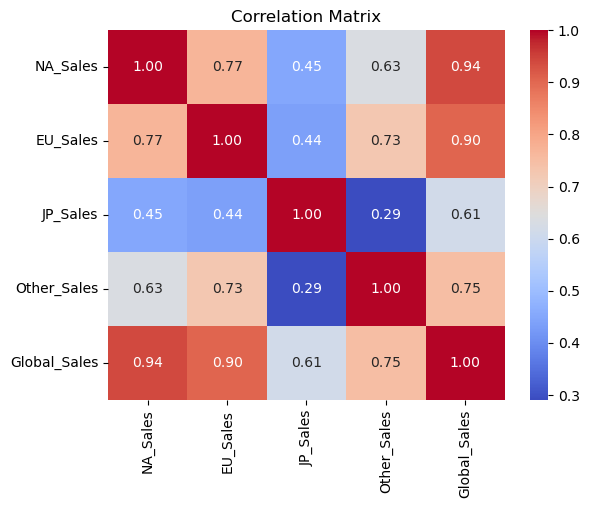

In [16]:
# Plot correlation matrix
corr = Videogames_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Looking at the correlation matrix, there aren't too many variables that show a very high correlation with another, except the North American sales and the European sales in relation to the Global sales this could be due to the fact that sales within these two regions make up a big portion of the global sales.

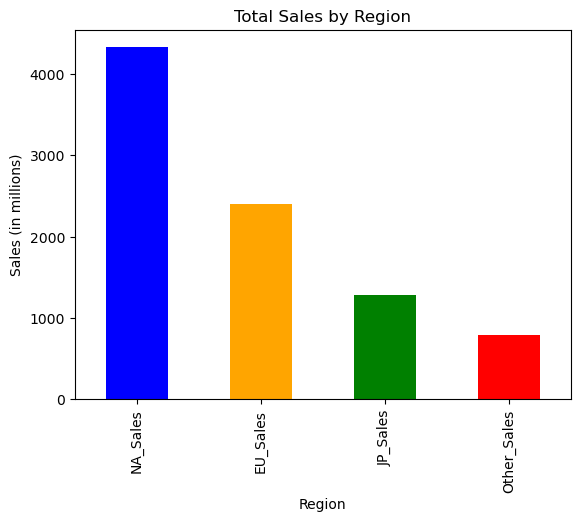

In [17]:
# Total sales for each region
region_sales = Videogames_df[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].sum()

# Bar plot
region_sales.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales (in millions)')
plt.show()

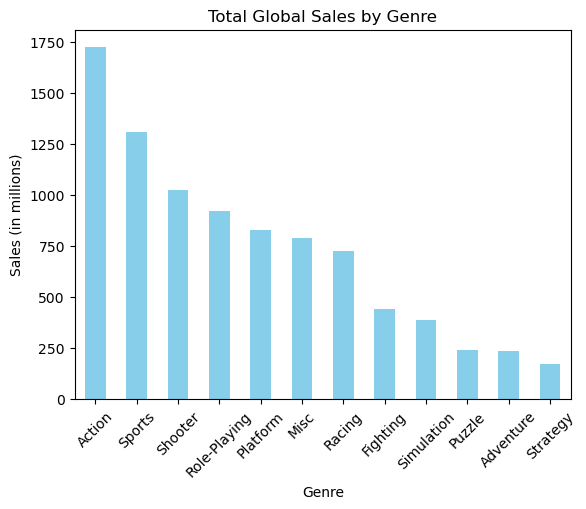

In [18]:
# Total sales by genre
genre_sales = Videogames_df.groupby('Genre')['Global_Sales'].sum()

# Bar plot
genre_sales.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

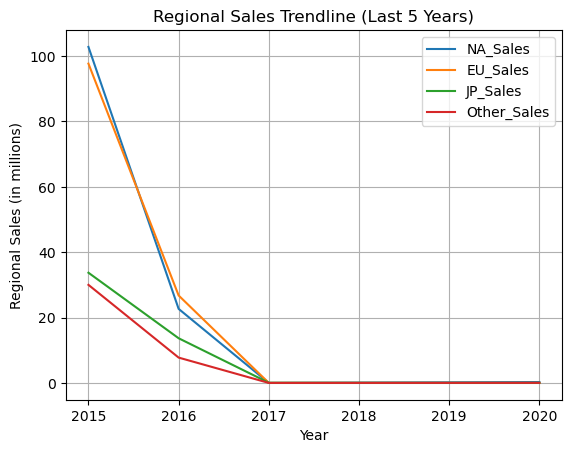

In [19]:
# data for the last five years
current_year = 2020
last_five_years_df = Videogames_df[(Videogames_df['Year'] >= current_year - 5) & (Videogames_df['Year'] <= current_year)]


# Group sales by year and sum them
regional_sales_by_year = last_five_years_df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Plotting the trendline
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
  plt.plot(regional_sales_by_year.index, regional_sales_by_year[region], label=region)

plt.xlabel('Year')
plt.ylabel('Regional Sales (in millions)')
plt.title('Regional Sales Trendline (Last 5 Years)')
plt.legend()
plt.grid(True)
plt.show()


**Scale Variables**


In [20]:
#Scale the numerical Variables
numerical_columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
scaler = StandardScaler()
Videogames_df[numerical_columns] = scaler.fit_transform(Videogames_df[numerical_columns])

# Convert categorical columns to numerical using encoding
Videogames_df['Platform'] = pd.factorize(Videogames_df['Platform'])[0]
Videogames_df['Genre'] = pd.factorize(Videogames_df['Genre'])[0]

**Feature Relationships**


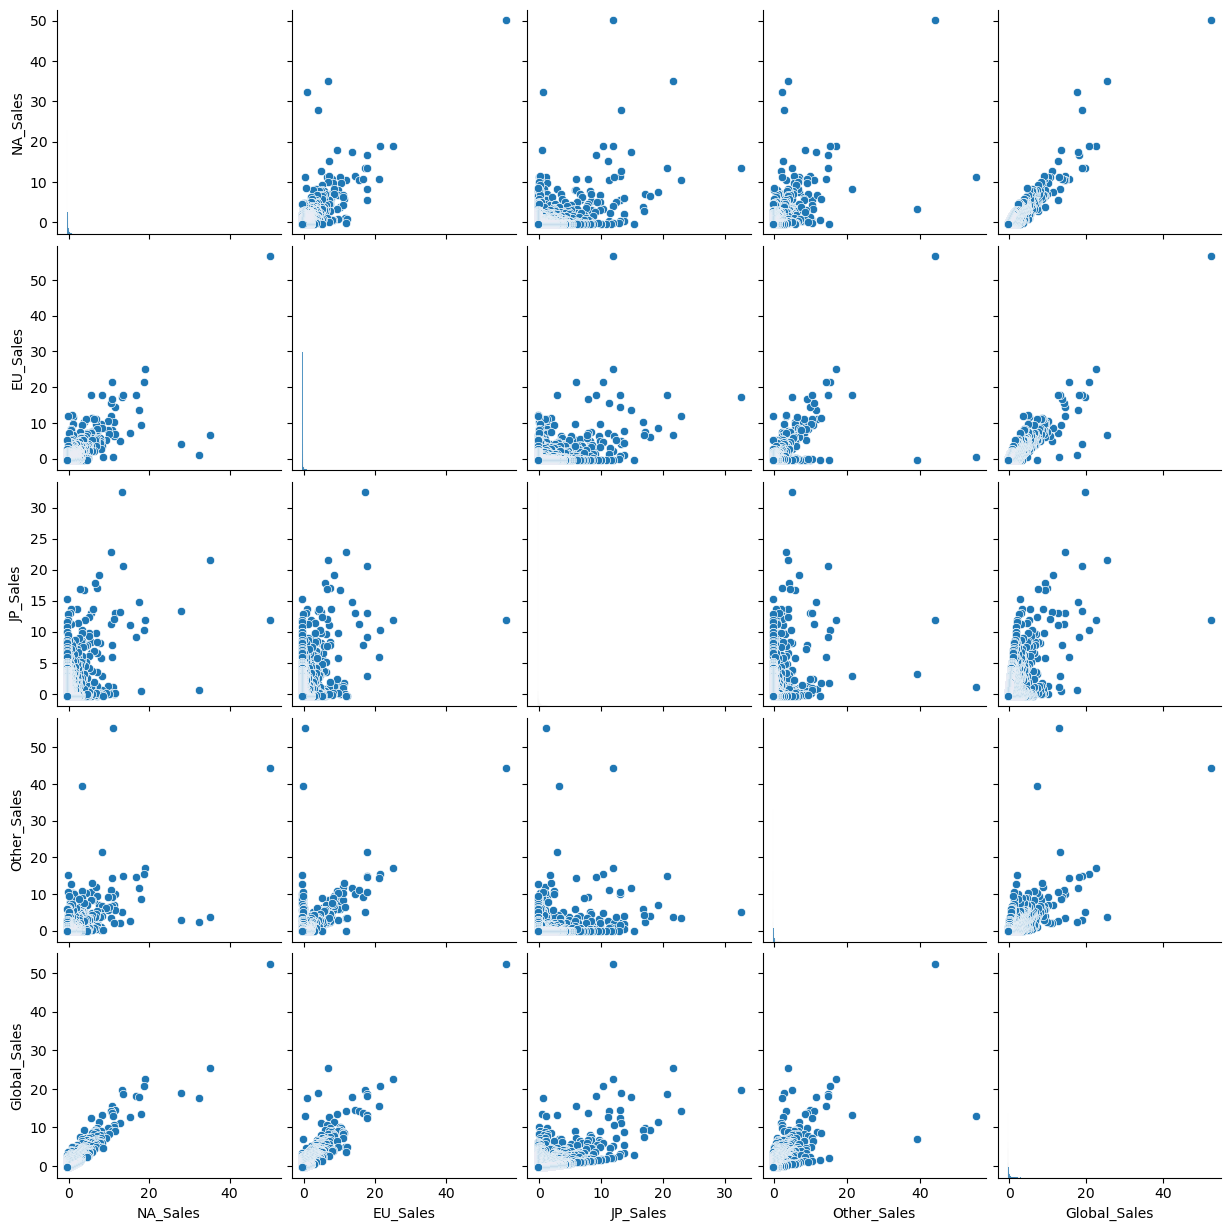

In [ ]:
sns.pairplot(Videogames_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
plt.show()

**Advanced Visualizations**

Visualize how different features (platform and genre) affect global sales using scatter plots.

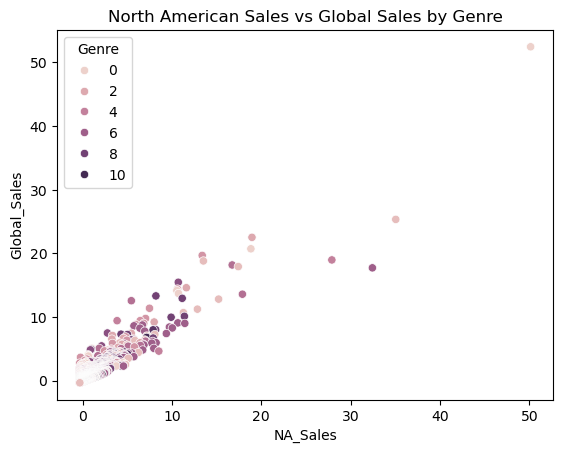

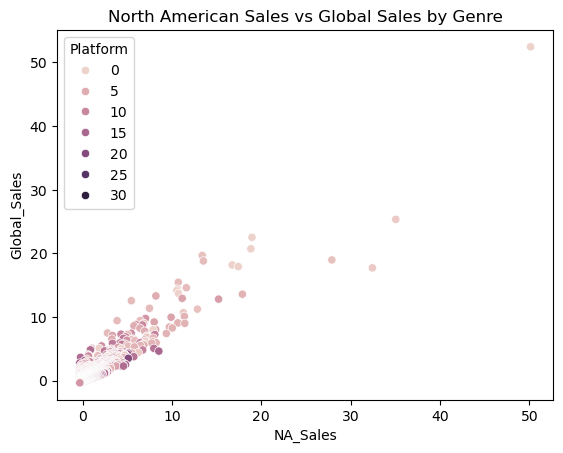

In [22]:
sns.scatterplot(x='NA_Sales', y='Global_Sales', hue='Genre', data=Videogames_df)
plt.title('North American Sales vs Global Sales by Genre')
plt.show()

sns.scatterplot(x='NA_Sales', y='Global_Sales', hue='Platform', data=Videogames_df)
plt.title('North American Sales vs Global Sales by Genre')
plt.show()

Looking at the points on both graphs visualizing the sales Globally vs in North America, based on the genre and platform. A lot of the video games generated similar sales, with a few outliers genreating sales sover 20 million.

**Feature Importance Analysis**


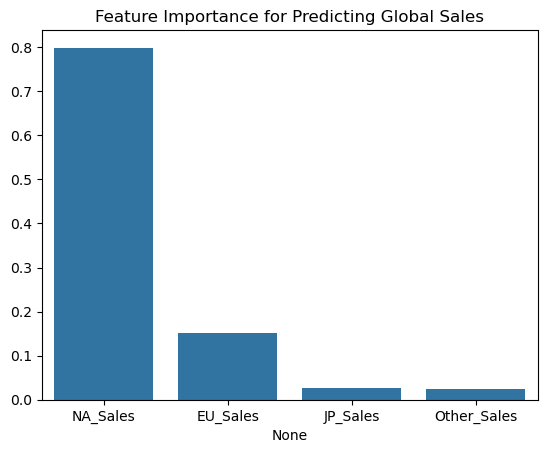

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fit a Random Forest model to estimate feature importance
model = RandomForestRegressor(n_estimators=100)
model.fit(Videogames_df[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']], Videogames_df['Global_Sales'])

# Plot feature importance
feature_importance = model.feature_importances_
sns.barplot(x=Videogames_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].columns, y=feature_importance)
plt.title('Feature Importance for Predicting Global Sales')
plt.show()


According to the Feature importance, North American sales is the most important variable when it comes to understandign sales within each cluster. Again this could be due to the fact that North American sales make up the largest market within the video game market.

# **Algorithm Implementation and Fine-tuning**


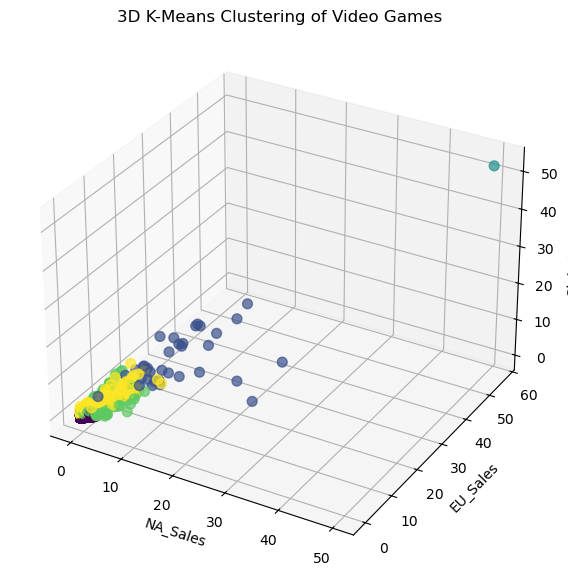

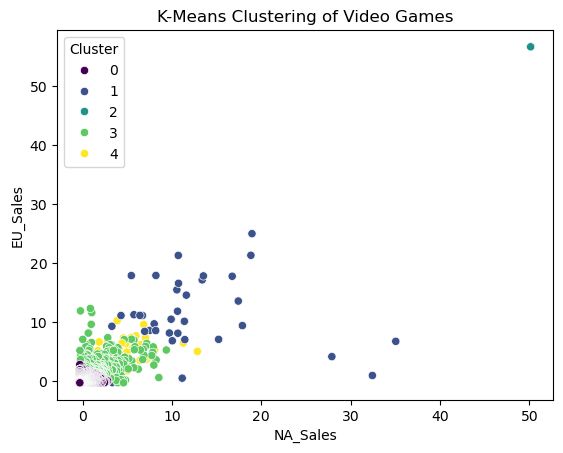

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# Implement KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
Videogames_df['Cluster'] = kmeans.fit_predict(Videogames_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the 3D view
ax.scatter(
    Videogames_df['NA_Sales'],
    Videogames_df['EU_Sales'],
    Videogames_df['Global_Sales'],
    c=Videogames_df['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7
)

# Labels for the axes
ax.set_xlabel('NA_Sales')
ax.set_ylabel('EU_Sales')
ax.set_zlabel('Global_Sales')

# Title of the plot
ax.set_title('3D K-Means Clustering of Video Games')

plt.show()


# Visualize clusters
sns.scatterplot(x='NA_Sales', y='EU_Sales', hue='Cluster', data=Videogames_df, palette='viridis')
plt.xlabel('NA_Sales')
plt.ylabel('EU_Sales')
plt.title('K-Means Clustering of Video Games')
plt.show()


Looking at the K-means clustering the clusters 0 and 3 are very close to the point of overlap this could mean that there are a lot of similar charactersitics within the clusters.
The other cluster seem to move far away indicating increasing differences between the clusters. With cluster 2 so far away this could be dependent on the issue of outliers present within the cluster.

**Hyperparameter Tuning**



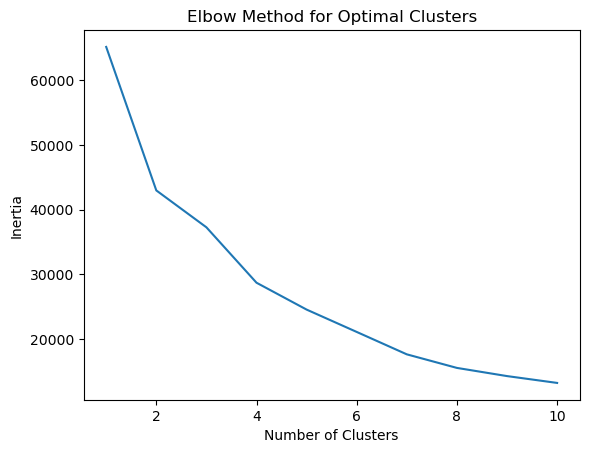

In [58]:
# Find optimal clusters using Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(Videogames_df[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Looking at the elbow graph, which helps us determine the optimal number of clusters. Our optimal number of clusters would be 4.

# **Results and Evaluation**

In [46]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(Videogames_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']], Videogames_df['Cluster'])
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.8096777119124283


The Silhouette Score of 0.81 means that the clustering model is quite effective. The data points are well-grouped, and the clusters are clearly distinguishable from each other. This indicates that the K-means algorithm has done a great job in identifying meaningful clusters in the data. However, further refinement (such as adjusting k or using a different clustering algorithm) could potentially improve the score further.

**Performance Metrics**

**K-Fold Cross-Validation**

In [ ]:
# Resetting the index for consistent row references
Videogames_df.reset_index(drop=True, inplace=True)

# Adding a new column for cluster labels
Videogames_df['Cluster'] = np.nan  

# Cross-validation loop:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(Videogames_df):
    # Train the model (k-means clustering, for example)
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(Videogames_df.iloc[train_index][numerical_columns])

    # Get cluster labels for the test set
    cluster_labels = kmeans.predict(Videogames_df.iloc[test_index][numerical_columns])

    # Assign cluster labels to the correct positions in the DataFrame
    Videogames_df.iloc[test_index, Videogames_df.columns.get_loc('Cluster')] = cluster_labels

# Now you can proceed with analysis
# Calculate the average silhouette score across all folds
avg_silhouette_score = np.mean(sil_score)

print(f"Average Silhouette Score across all folds: {avg_silhouette_score}")
# View games in each cluster
for cluster_num in range(kmeans.n_clusters):
    print(f"Cluster {cluster_num} games:")
    cluster_games = Videogames_df[Videogames_df['Cluster'] == cluster_num]
    print(cluster_games[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' , 'Global_Sales']])
    print("\n")

Average Silhouette Score across all folds: 0.8096777119124283
Cluster 0 games:
                                                   Name  NA_Sales  EU_Sales  \
619                                            NBA 2K14  2.230469  0.102631   
634                            Dragon Ball Z: Budokai 2  1.658976  0.141902   
635                                    ATV Offroad Fury  2.193991  0.220443   
642                                      Theme Hospital  2.473658 -0.093722   
651                                     WCW/nWo Revenge  2.035918  0.475702   
...                                                 ...       ...       ...   
16286                Woody Woodpecker in Crazy Castle 5 -0.310852 -0.290075   
16287                     Men in Black II: Alien Escape -0.310852 -0.290075   
16288  SCORE International Baja 1000: The Official Game -0.323011 -0.290075   
16289                                        Know How 2 -0.323011 -0.270439   
16290                                  Spirits & Spe

In [60]:
Videogames_df.head(30)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Cluster
0,1,Wii Sports,0,2006.0,0,Nintendo,50.126469,56.691515,11.835597,44.253501,52.446423,2.0
1,2,Super Mario Bros.,1,1985.0,1,Nintendo,35.036615,6.739357,21.583251,3.796218,25.329663,4.0
2,3,Mario Kart Wii,0,2008.0,2,Nintendo,18.949687,25.000169,11.899727,17.159222,22.509520,4.0
3,4,Wii Sports Resort,0,2009.0,0,Nintendo,18.828093,21.328372,10.264430,15.317863,20.710243,2.0
4,5,Pokemon Red/Pokemon Blue,2,1996.0,3,Nintendo,13.380668,17.165692,32.517296,5.006254,19.670236,4.0
5,6,Tetris,2,1989.0,4,Nintendo,27.886869,4.147499,13.278507,2.796623,18.962010,4.0
6,7,New Super Mario Bros.,3,2006.0,1,Nintendo,13.514422,17.833291,20.589247,15.002201,18.802499,4.0
7,8,Wii Play,0,2006.0,5,Nintendo,16.736671,17.774385,9.142167,14.739150,18.170838,4.0
8,9,New Super Mario Bros. Wii,0,2009.0,1,Nintendo,17.417599,13.572435,14.817610,11.635145,17.915622,2.0
9,10,Duck Hunt,1,1984.0,6,Nintendo,32.422337,0.946948,0.645035,2.217911,17.717829,4.0


Based on the clustering analysis, we have identified 5 distinct clusters in the dataset, each containing different sets of video games with varying sales characteristics.

With an average Silhouette Score of 0.8097, we can conclude that the clusters are well-formed, with good separation between them. A score above 0.8 generally indicates that the clustering is effective and that the model has done a great job in grouping similar games together.

Cluster Breakdown:

Cluster 0:

Characteristics:

This cluster seems to contain video games with lower global sales on average.
The NA_Sales and EU_Sales are also relatively low, with some negative or close-to-zero values, indicating that these games may not have performed well in those regions.
These games tend to have very low Global Sales (negative or near-zero values).

Interpretation:

Games in this cluster could be underperformers in the market, possibly niche games or games with limited appeal. Their low regional and global sales might reflect limited distribution, niche genres, or other factors affecting their sales performance.

Cluster 1:

Characteristics:

This cluster consists of games with high global sales, especially those with strong performance in NA_Sales and EU_Sales.
Many of these games, such as Nintendogs, Grand Theft Auto: San Andreas, and Super Mario World, are well-known, successful titles with a broad fanbase.

Interpretation:

This cluster contains highly popular games that have had substantial sales success across different regions. These games are likely to have a strong global presence, indicating their widespread popularity and marketing success.
The presence of games with multi-million unit sales suggests that this cluster includes mainstream, best-selling games.

Cluster 2:

Characteristics:

This cluster is characterized by games with very high global sales, particularly titles that are very successful in NA_Sales and EU_Sales (e.g., Wii Sports, Wii Sports Resort).
These games tend to have very high JP_Sales as well, particularly for Nintendo-based titles, showing a dominant market presence in Japan.

Interpretation:

Cluster 2 contains blockbuster games that likely have global recognition and very strong sales across multiple regions. The games in this cluster are likely from popular franchises, especially from Nintendo, which tends to perform well across all markets.
These games are highly influential and have captured large, broad audiences, resulting in massive global sales.

Cluster 3:

Characteristics:

This cluster contains moderate to high sales games, with a strong presence in NA_Sales and EU_Sales.
Games like Call of Duty: Modern Warfare 3 and Grand Theft Auto IV have significant sales in these regions, though they may not be as top-performing as the games in Cluster 2.

Interpretation:

These games are successful but not as globally dominant as those in Cluster 2. They still perform well in key markets like North America and Europe, but they don't necessarily achieve the same level of global sales success.
These could be mid-tier, high-selling games that perform well in their release years but may not have had the same enduring, massive appeal as games in Cluster 2.

Cluster 4:

Characteristics:

This cluster includes a mix of classic and retro games that have experienced substantial success in earlier years (e.g., Super Mario Bros., Mario Kart Wii, Tetris).
The Global Sales are substantial for many games, but there are also some with negative or low sales in the dataset (likely games with limited success or those with negative sales values due to returns or write-offs).

Interpretation:

Cluster 4 seems to contain iconic games that have either had sustained sales over time or represent high-performing titles from past generations.
Some games here might reflect a nostalgic market, where older titles still retain relevance and strong sales in certain markets (especially in Japan and North America).


**Baseline Comparison**

In [41]:
import numpy as np
random_clusters = np.random.randint(0, 5, size=len(Videogames_df))
baseline_score = silhouette_score(Videogames_df[['NA_Sales', 'EU_Sales', 'JP_Sales','Global_Sales', 'Other_Sales']], random_clusters)
print(f'Baseline Silhouette Score: {baseline_score}')


Baseline Silhouette Score: -0.06168311041274869


The baseline silhouette score of -0.0243/-0.0617 indicates poor clustering quality, as expected from random cluster assignments. A negative score suggests that the data points are poorly grouped, with some likely being closer to neighboring clusters than to their assigned cluster. This score serves as a reference point, highlighting that any meaningful clustering algorithm should outperform random assignments. The goal is to achieve a higher silhouette score, closer to 1, which would demonstrate well-separated and cohesive clusters. Therefore, the negative baseline score underscores the potential for improvement using clustering algorithms that consider the underlying patterns in the data.

**Get the labels back into the dataset**


# **Results and Interpretation**

**Interpretation of Results**

Interpret the clusters

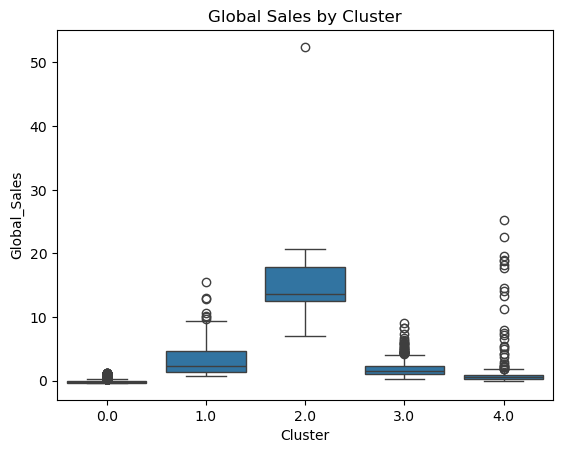

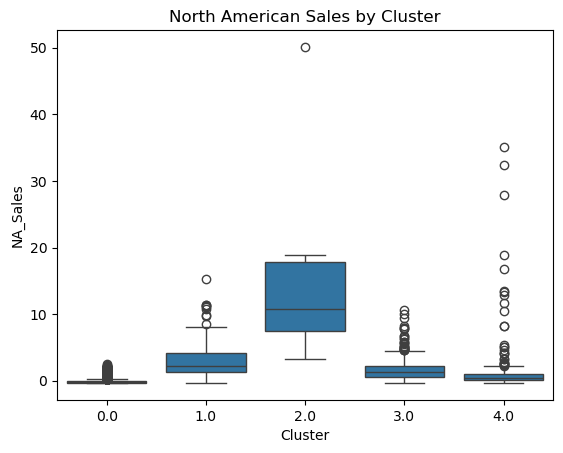

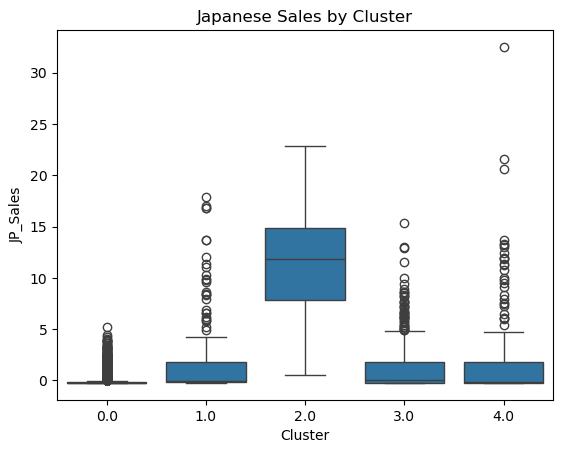

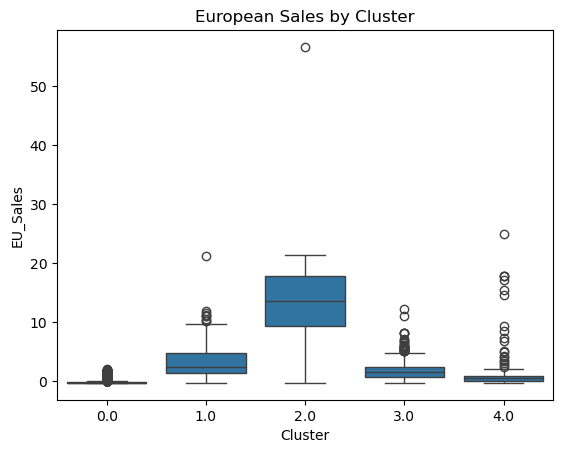

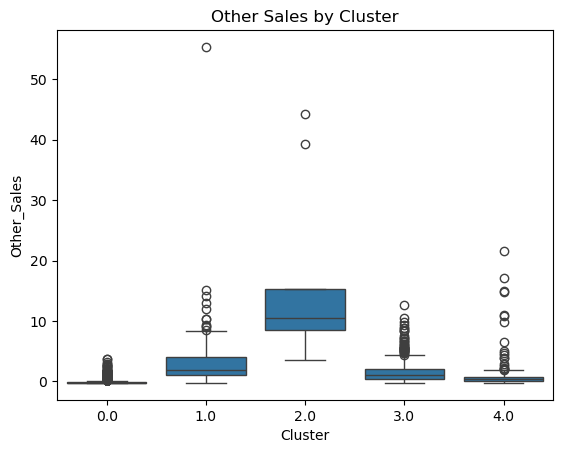

In [61]:
sns.boxplot(x='Cluster', y='Global_Sales', data=Videogames_df)
plt.title('Global Sales by Cluster')
plt.show()

sns.boxplot(x='Cluster', y='NA_Sales', data=Videogames_df)
plt.title('North American Sales by Cluster')
plt.show()

sns.boxplot(x='Cluster', y='JP_Sales', data=Videogames_df)
plt.title('Japanese Sales by Cluster')
plt.show()

sns.boxplot(x='Cluster', y='EU_Sales', data=Videogames_df)
plt.title('European Sales by Cluster')
plt.show()

sns.boxplot(x='Cluster', y='Other_Sales', data=Videogames_df)
plt.title('Other Sales by Cluster')
plt.show()

I wanted to visualize the distributions of the different sales by cluster,and looking at the graph, as expected based on the k-means graph, cluster 2 shows the highest average sales, indicatign that within that cluster are all the games that exhibited the ihghest sales. Another thing to note is the many ouliers present, specifically in cluster 4.

**Difficulties**

The main issue I had working through this project with the data chosen, was the removal of the outliers within the data. I found after removing the outliers their were gaps in the histograms, and other graphs visulalizing relationships between variables showed unusual ditributions. This could be due to the fact that the outliers present in the data represent the more popular games as their sales are vastly different from anything else present in the dataset. Considering this, I had to do the cluster analysis with the outliers still present in the data.

**Discussion and Business Use Case**

Game Publishers can use the clusters to identify which types of games perform better in specific regions or platforms.
Investors/Marketers could target specific clusters for marketing efforts.

**Conclusion**

Overall, the clusters seem to have performed well at seperating the different groups of games and their sales, some improvements could have been made around the outliers and potentially handling them differently.

## **Classification Models**

After I dentifying the clusters, adn adding the cluster labels back into the data. I trained a Logistic Regression and a Random Forest Classifier to predict which videogames would end up in which clusters.

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Define features (X) and target (y)
X = Videogames_df[numerical_columns]
y = Videogames_df['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict and evaluate Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict and evaluate Random Forest
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")

Logistic Regression Results:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      4357
         1.0       0.32      0.44      0.37        16
         2.0       0.00      0.00      0.00         7
         3.0       0.57      0.92      0.70       149
         4.0       0.00      0.00      0.00       359

    accuracy                           0.92      4888
   macro avg       0.36      0.47      0.41      4888
weighted avg       0.86      0.92      0.89      4888

Accuracy: 0.9175531914893617


c:\Users\Natasha Maina\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Natasha Maina\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Natasha Maina\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Results:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      4357
         1.0       0.24      0.62      0.34        16
         2.0       0.00      0.00      0.00         7
         3.0       0.52      0.81      0.63       149
         4.0       0.14      0.00      0.01       359

    accuracy                           0.91      4888
   macro avg       0.37      0.49      0.39      4888
weighted avg       0.87      0.91      0.88      4888

Accuracy: 0.9144844517184942


c:\Users\Natasha Maina\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Natasha Maina\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Natasha Maina\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
